# Continuity

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sympy

The history saving thread hit an unexpected error (OperationalError('attempt to write a readonly database')).History will not be written to the database.


## **Definition of Continuity at a Point**

Let $c$ be a real number that is either an interior point or an endpoint of an interval in the domain of $f$.

- The function $f$ is **continuous at $c$** if:

$$
\lim_{x \to c} f(x) = f(c)
$$

- The function $f$ is **right-continuous at $c$** (or **continuous from the right**) if:

$$
\lim_{x \to c^+} f(x) = f(c)
$$

- The function $f$ is **left-continuous at $c$** (or **continuous from the left**) if:

$$
\lim_{x \to c^-} f(x) = f(c)
$$


## Types of Discontinuities

When we talk about the **continuity** of a function, we're essentially asking if you can draw its graph without lifting your pen. If you have to lift your pen, that's a **discontinuity**. There are three main types of discontinuities you'll encounter:

### 1. Removable Discontinuity

Imagine a function's graph that's mostly smooth, but has a tiny "hole" in it. That's a **removable discontinuity**. It's called "removable" because you could, in theory, "fill in" that hole with a single point to make the function continuous at that spot.

Mathematically, a removable discontinuity at $x=c$ occurs when:
* The **limit of the function exists** as $x$ approaches $c$ (i.e., $\lim_{x \to c} f(x) = L$ for some finite number $L$).
* However, either $f(c)$ is **undefined** (there's a hole), or $f(c)$ is **defined but not equal to the limit** (the point is somewhere else, not filling the hole).

**Example:** Consider the function $f(x) = \frac{x^2 - 1}{x - 1}$.
If you factor the numerator, you get $f(x) = \frac{(x-1)(x+1)}{x-1}$. For $x \neq 1$, this simplifies to $f(x) = x+1$.
At $x=1$, the function is undefined, creating a hole. However, $\lim_{x \to 1} \frac{x^2 - 1}{x - 1} = \lim_{x \to 1} (x+1) = 2$.
So, there's a removable discontinuity at $x=1$.

---

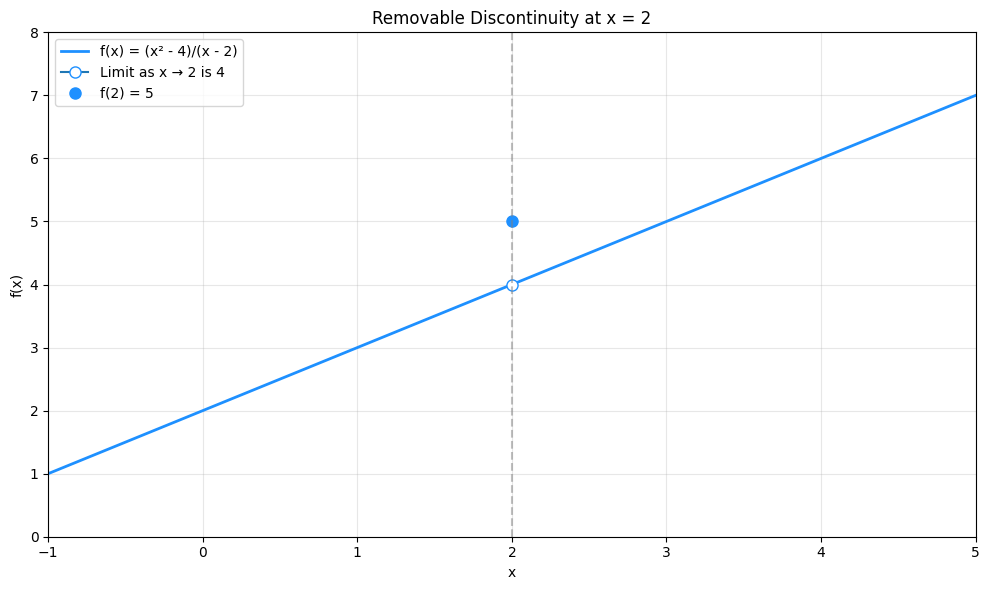

In [26]:
def f(x):
    return np.where(np.abs(x - 2) > 1e-3, (x**2 - 4)/(x - 2), np.nan)

x = np.linspace(-1, 5, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, color='dodgerblue', linewidth=2, label='f(x) = (x² - 4)/(x - 2)')


plt.plot(2, 4, marker='o', markersize=8, markerfacecolor='white',
         markeredgecolor='dodgerblue', label='Limit as x → 2 is 4')
plt.plot(2, 5, 'ro', markersize=8, label='f(2) = 5',
        markerfacecolor='dodgerblue', markeredgecolor='dodgerblue'
        )
plt.axvline(x=2, color='gray', linestyle='--', alpha=0.5)
plt.xlim(-1, 5)
plt.ylim(0, 8)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Removable Discontinuity at x = 2')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### 2. Jump Discontinuity

A **jump discontinuity** is exactly what it sounds like: the function's graph "jumps" from one value to another at a specific point. You can't draw this without lifting your pen and repositioning it.

This type of discontinuity happens when:
* Both the **left-hand limit** ($\lim_{x \to c^-} f(x)$) and the **right-hand limit** ($\lim_{x \to c^+} f(x)$) exist and are finite.
* However, the **left-hand limit is not equal to the right-hand limit**.

**Example:** A classic example is the **step function** or **greatest integer function** ($f(x) = \lfloor x \rfloor$).
At any integer value, say $x=2$:
$\lim_{x \to 2^-} \lfloor x \rfloor = 1$
$\lim_{x \to 2^+} \lfloor x \rfloor = 2$
Since the left and right limits are different, there's a jump discontinuity at $x=2$.

---

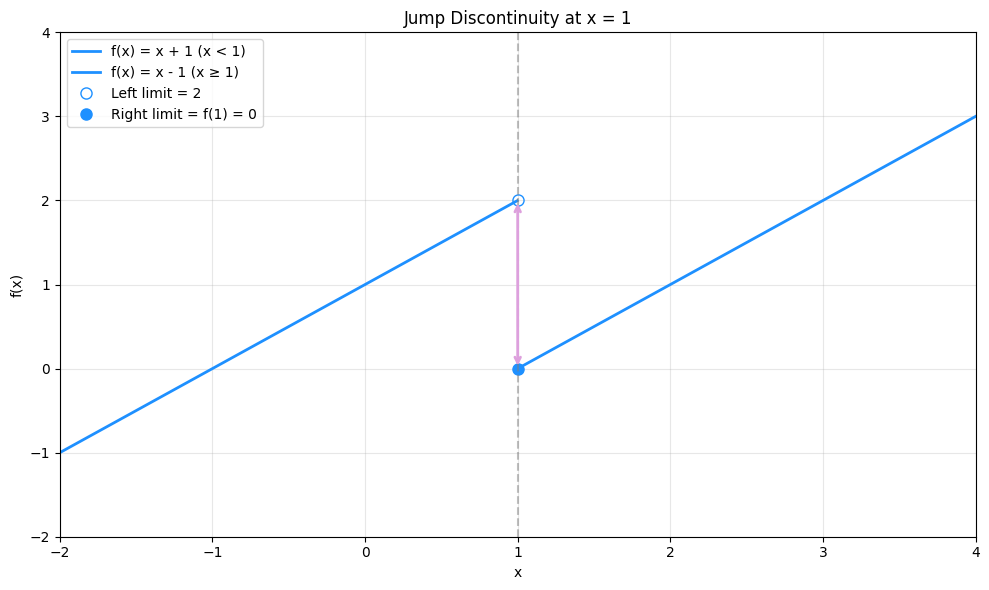

In [32]:
x = np.linspace(-2, 4, 1000)

# Define piecewise function
def g(x):
    return np.where(x < 1, x + 1, x - 1)
y = g(x)
plt.figure(figsize=(10, 6))

# Plot left piece
x_left = x[x < 1]
y_left = x_left + 1
plt.plot(x_left, y_left, 'dodgerblue', linewidth=2, label='f(x) = x + 1 (x < 1)')

# Plot right piece
x_right = x[x >= 1]
y_right = x_right - 1
plt.plot(x_right, y_right, 'dodgerblue', linewidth=2, label='f(x) = x - 1 (x ≥ 1)')

# Show left limit
plt.plot(1, 2, 'bo', markersize=8, fillstyle='none', markerfacecolor='dodgerblue', markeredgecolor='dodgerblue',
         linewidth=2, label='Left limit = 2')

# Show right limit and function value
plt.plot(1, 0, 'ro', markersize=8, label='Right limit = f(1) = 0', markerfacecolor='dodgerblue', markeredgecolor='dodgerblue')

# Add vertical line at discontinuity
plt.axvline(x=1, color='gray', linestyle='--', alpha=0.5)

# Draw jump arrow
plt.annotate('', xy=(1, 0), xytext=(1, 2), 
            arrowprops=dict(arrowstyle='<->', color='plum', lw=2))
plt.xlim(-2, 4)
plt.ylim(-2, 4)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Jump Discontinuity at x = 1')
plt.legend()
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

### 3. Infinite Discontinuity

An **infinite discontinuity** occurs when the function's value shoots off to positive or negative infinity as it approaches a certain point. This often corresponds to a **vertical asymptote** on the graph.

This happens when:
* One or both of the **one-sided limits** ($\lim_{x \to c^-} f(x)$ or $\lim_{x \to c^+} f(x)$) are **infinite** ($\pm \infty$).

**Example:** Consider the function $f(x) = \frac{1}{x-2}$.
As $x$ approaches $2$ from the left, $\lim_{x \to 2^-} \frac{1}{x-2} = -\infty$.
As $x$ approaches $2$ from the right, $\lim_{x \to 2^+} \frac{1}{x-2} = +\infty$.
Because the function tends towards infinity, there's an infinite discontinuity at $x=2$.

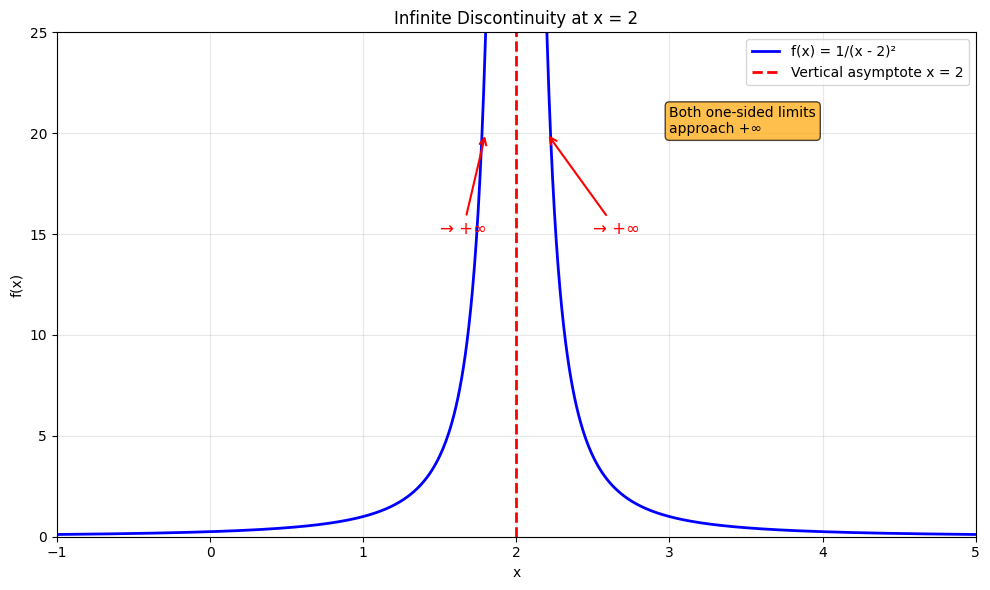

In [16]:
x = np.linspace(-1, 5, 1000)

# Remove points too close to x = 2 to avoid division by zero
mask = np.abs(x - 2) > 0.05
x_filtered = x[mask]

# Function with vertical asymptote
y = 1 / (x_filtered - 2)**2

plt.figure(figsize=(10, 6))

# Plot left and right pieces separately
x_left = x_filtered[x_filtered < 2]
y_left = 1 / (x_left - 2)**2
plt.plot(x_left, y_left, 'b-', linewidth=2, label='f(x) = 1/(x - 2)²')

x_right = x_filtered[x_filtered > 2]
y_right = 1 / (x_right - 2)**2
plt.plot(x_right, y_right, 'b-', linewidth=2)

# Add vertical asymptote
plt.axvline(x=2, color='red', linestyle='--', linewidth=2, 
            label='Vertical asymptote x = 2')

# Add arrows indicating infinite behavior
plt.annotate('→ +∞', xy=(1.8, 20), xytext=(1.5, 15), 
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=12, color='red')
plt.annotate('→ +∞', xy=(2.2, 20), xytext=(2.5, 15), 
            arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
            fontsize=12, color='red')

plt.xlim(-1, 5)
plt.ylim(0, 25)
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Infinite Discontinuity at x = 2')
plt.legend()
plt.grid(True, alpha=0.3)

# Add text explanation
plt.text(3, 20, 'Both one-sided limits\napproach +∞', 
         fontsize=10, bbox=dict(boxstyle="round,pad=0.3", facecolor="orange", alpha=0.7))

plt.tight_layout()
plt.show()

---

## Continuous Extension to a Point

The concept of a **continuous extension to a point** specifically addresses **removable discontinuities**. If a function $f(x)$ has a removable discontinuity at a point $x=c$, meaning $\lim_{x \to c} f(x) = L$ but $f(c)$ is either undefined or not equal to $L$, we can "extend" or "redefine" the function to make it continuous at that point.

We do this by creating a **new function**, let's call it $F(x)$, defined as:

$F(x) = \begin{cases} f(x) & \text{if } x \neq c \\ L & \text{if } x = c \end{cases}$

Here, $L$ is the value of the limit of $f(x)$ as $x$ approaches $c$. By defining $F(c)$ to be exactly equal to the limit $L$, we satisfy all three conditions for continuity at $x=c$:
1.  $F(c)$ is defined ($=L$).
2.  $\lim_{x \to c} F(x)$ exists ($=L$).
3.  $\lim_{x \to c} F(x) = F(c)$.

**Example (revisited):** For $f(x) = \frac{x^2 - 1}{x - 1}$, we found a removable discontinuity at $x=1$ and $\lim_{x \to 1} f(x) = 2$.
We can create a continuous extension $F(x)$:

$F(x) = \begin{cases} \frac{x^2 - 1}{x - 1} & \text{if } x \neq 1 \\ 2 & \text{if } x = 1 \end{cases}$

This new function $F(x)$ is continuous at $x=1$ (and everywhere else). Essentially, $F(x)$ is simply the line $y=x+1$.

Understanding these different types of discontinuities helps you analyze the behavior of functions and provides a deeper insight into the concept of continuity, which is fundamental in calculus and real analysis.

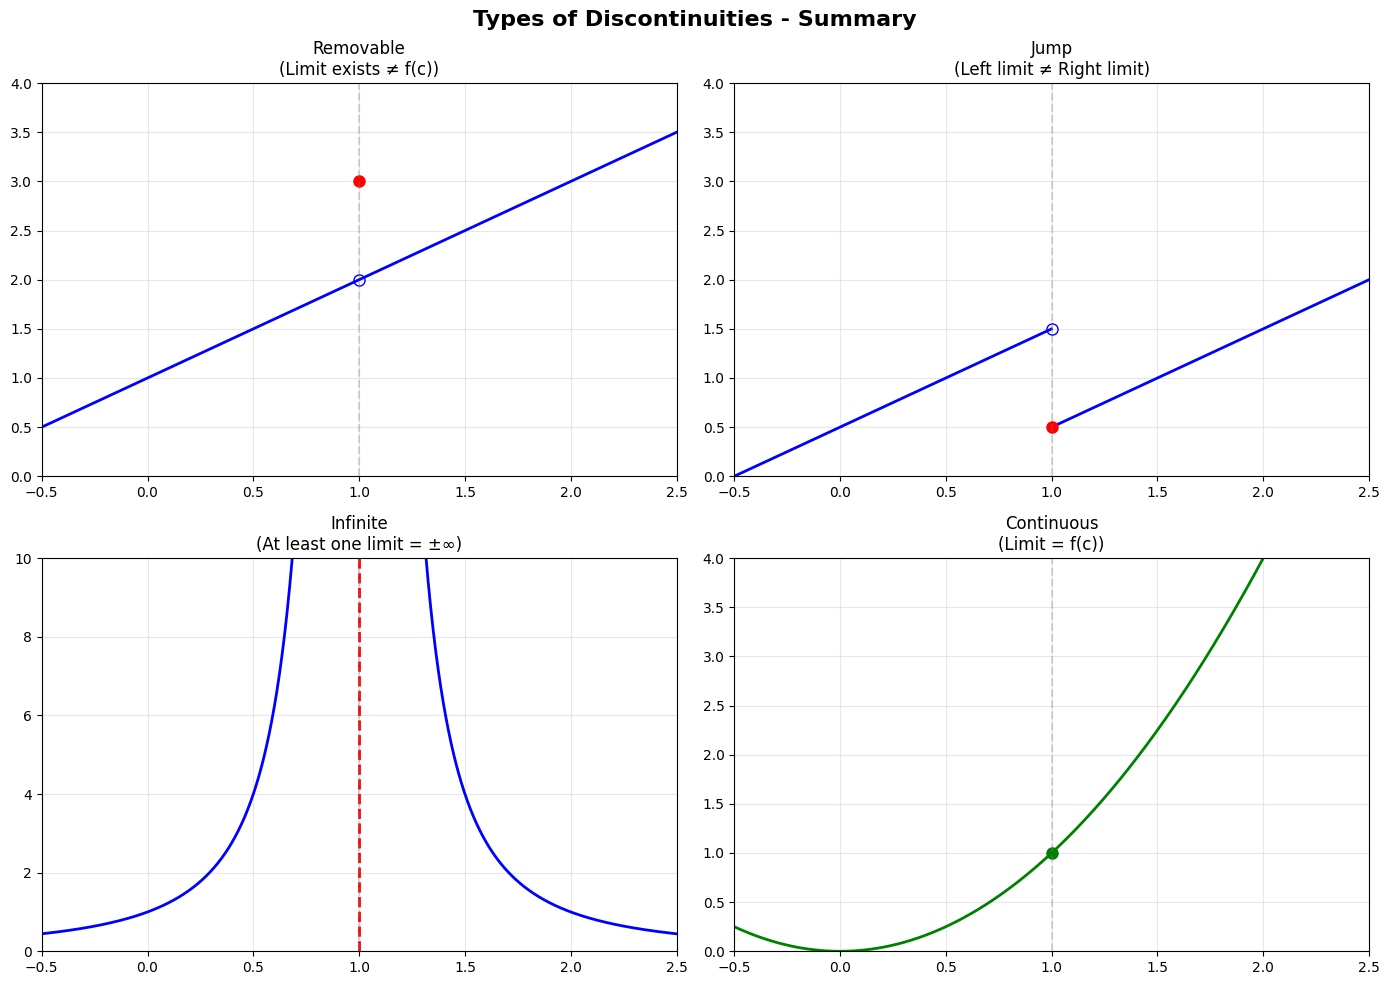

In [17]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Removable
x = np.linspace(-0.5, 2.5, 1000)
mask = np.abs(x - 1) > 0.01
x_filt = x[mask]
y = (x_filt**2 - 1) / (x_filt - 1)

axes[0,0].plot(x_filt, y, 'b-', linewidth=2)
axes[0,0].plot(1, 2, 'bo', markersize=8, fillstyle='none', linewidth=2)
axes[0,0].plot(1, 3, 'ro', markersize=8)
axes[0,0].set_title('Removable\n(Limit exists ≠ f(c))')
axes[0,0].grid(True, alpha=0.3)
axes[0,0].set_ylim(0, 4)

# Jump
x = np.linspace(-0.5, 2.5, 1000)
y = np.where(x < 1, x + 0.5, x - 0.5)
axes[0,1].plot(x[x < 1], y[x < 1], 'b-', linewidth=2)
axes[0,1].plot(x[x >= 1], y[x >= 1], 'b-', linewidth=2)
axes[0,1].plot(1, 1.5, 'bo', markersize=8, fillstyle='none', linewidth=2)
axes[0,1].plot(1, 0.5, 'ro', markersize=8)
axes[0,1].set_title('Jump\n(Left limit ≠ Right limit)')
axes[0,1].grid(True, alpha=0.3)
axes[0,1].set_ylim(0, 4)

# Infinite
x = np.linspace(-0.5, 2.5, 1000)
mask = np.abs(x - 1) > 0.05
x_filt = x[mask]
y = 1 / (x_filt - 1)**2
axes[1,0].plot(x_filt[x_filt < 1], y[x_filt < 1], 'b-', linewidth=2)
axes[1,0].plot(x_filt[x_filt > 1], y[x_filt > 1], 'b-', linewidth=2)
axes[1,0].axvline(1, color='red', linestyle='--', linewidth=2)
axes[1,0].set_title('Infinite\n(At least one limit = ±∞)')
axes[1,0].grid(True, alpha=0.3)
axes[1,0].set_ylim(0, 10)

# Continuous (for comparison)
x = np.linspace(-0.5, 2.5, 1000)
y = x**2
axes[1,1].plot(x, y, 'g-', linewidth=2)
axes[1,1].plot(1, 1, 'go', markersize=8)
axes[1,1].set_title('Continuous\n(Limit = f(c))')
axes[1,1].grid(True, alpha=0.3)
axes[1,1].set_ylim(0, 4)

for ax in axes.flat:
    ax.set_xlim(-0.5, 2.5)
    ax.axvline(1, color='gray', linestyle='--', alpha=0.3)

plt.suptitle('Types of Discontinuities - Summary', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

## **Definition of Continuous Functions**
Let $A \subseteq R$, let $f : A \to R$, and let $c \in A$. We say that $f$ is **continuous at $c$** if, given any number $\epsilon > 0$, there exists $\delta > 0$ such that if $x$ is any point of $A$ satisfying $|x - c| < \delta$, then $|f(x) - f(c)| < \epsilon$.

If $f$ fails to be continuous at $c$, then we say that $f$ is **discontinuous at $c$**.

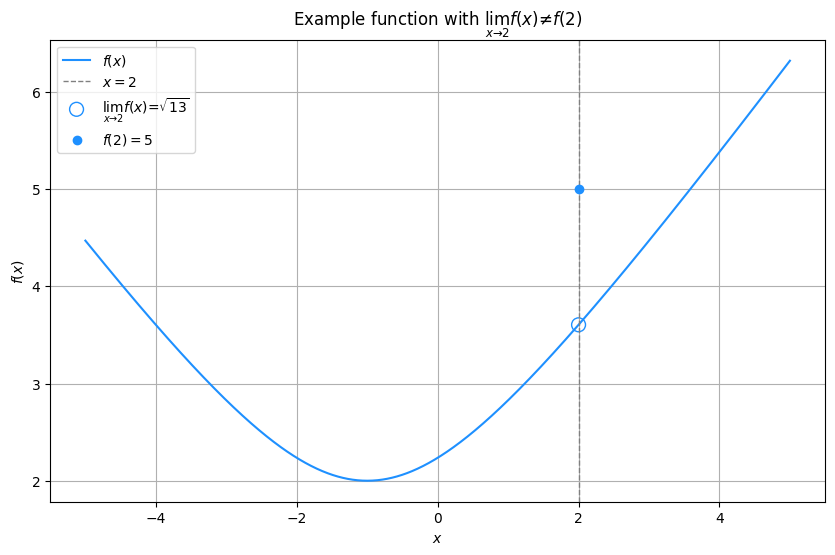

In [18]:
def f(x):
    return np.where(x == 2, 5, np.sqrt(x**2 + 2*x + 5))

x = np.linspace(-5, 5, 1000)
y = f(x)

plt.figure(figsize=(10, 6))
plt.plot(x, y, label=r'$f(x)$', color='dodgerblue')
plt.axvline(2, color='gray', linestyle='--', linewidth=1, label=r'$x = 2$')

plt.scatter(2, np.sqrt(13), facecolors='none', edgecolors='dodgerblue', s=100, label=r'$\lim_{x \to 2} f(x) = \sqrt{13}$')
plt.scatter(2, 5, color='dodgerblue', label=r'$f(2) = 5$', zorder=5)

plt.title(r'Example function with $\lim_{x \to 2} f(x) \ne f(2)$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.legend()
plt.grid(True)
plt.show()

### Function to Test
We will test the continuity of the following piecewise function at $x = 2$:

$$f(x) = \begin{cases}
\sqrt{x^2 + 2x + 5} & \text{if } x \neq 2 \\
5 & \text{if } x = 2
\end{cases}$$

### Step-by-Step Instructions for Continuity Test
1.  *Identify the Point of Interest*
- We are testing continuity at $c = 2$
- Note that $f(2) = 5$ (given by the piecewise definition)

2.  *Find the Limit as x Approaches c*
Calculate $\lim_{x \to 2} f(x)$:
- For $x \neq 2$, we have $f(x) = \sqrt{x^2 + 2x + 5}$
- Evaluate: $\lim_{x \to 2} \sqrt{x^2 + 2x + 5}$

3.  *Compare f(c) with the Limit*
- Check if $\lim_{x \to 2} f(x) = f(2)$
- If they are equal, proceed to the epsilon-delta verification
- If they are not equal, the function is discontinuous at $x = 2$

4.  *Epsilon-Delta Verification*
Question: Can we find $\delta > 0$ such that $|f(x) - f(2)| < \epsilon$ whenever $|x - 2| < \delta$?
Analysis:

For $x$ near 2 (but $x \neq 2$): $f(x) \approx \sqrt{13} \approx 3.606$
But $f(2) = 5$
So $|f(x) - f(2)| \approx |3.606 - 5| = 1.394$

#### Conclusion: 
No matter how small we make $\delta$, we cannot make $|f(x) - f(2)|$ smaller than approximately 1.394. Therefore, no suitable $\delta$ exists for $\epsilon < 1.394$.
This function is expected to fail the continuity test at $x = 2$, meaning it will be **discontinuous** at this point.

## **Properties of Continuous Functions**

If the functions $f$ and $g$ are continuous at $x = c$, then the following algebraic combinations are also continuous at $x = c$:

1.  **Sum:** The sum of the functions, $f(x) + g(x)$, is continuous at $x=c$.
2.  **Difference:** The difference of the functions, $f(x) - g(x)$, is continuous at $x=c$.
3.  **Product:** The product of the functions, $f(x) \cdot g(x)$, is continuous at $x=c$.
4.  **Quotient:** The quotient of the functions, $\frac{f(x)}{g(x)}$, is continuous at $x=c$, provided that $g(c) \neq 0$.
5.  **Constant Multiple:** The constant multiple of a function, $k \cdot f(x)$, is continuous at $x=c$ for any real number $k$.
6.  **Power:** The function $f(x)^n$ is continuous at $x=c$ for any positive integer $n$.
7.  **Root:** The function $\sqrt[n]{f(x)}$ is continuous at $x=c$ provided that the root is defined (for even roots, $f(c) > 0$).